# LIBRA and the Liquid Immersion Blanket
## 1L BABY
- Wall permeation
- FLiBe handing (ClLiF)
- Wall materials
- Tritium probe 

In [1]:
import openmc
import matplotlib.pyplot as plt

from run_model import model

isotopes ['Al27', 'Ar36', 'Ar38', 'Ar40', 'B10', 'B11', 'Be9', 'C12', 'C13', 'Ca40', 'Ca42', 'Ca43', 'Ca44', 'Ca46', 'Ca48', 'Co59', 'Cr50', 'Cr52', 'Cr53', 'Cr54', 'F19', 'Fe54', 'Fe56', 'Fe57', 'Fe58', 'H1', 'H2', 'K39', 'K40', 'K41', 'Li6', 'Li7', 'Mg24', 'Mg25', 'Mg26', 'Mn55', 'Mo100', 'Mo92', 'Mo94', 'Mo95', 'Mo96', 'Mo97', 'Mo98', 'N14', 'N15', 'Na23', 'Nb93', 'Ni58', 'Ni60', 'Ni61', 'Ni62', 'Ni64', 'O16', 'O17', 'O18', 'P31', 'Pb204', 'Pb206', 'Pb207', 'Pb208', 'S32', 'S33', 'S34', 'S36', 'Si28', 'Si29', 'Si30', 'Ti46', 'Ti47', 'Ti48', 'Ti49', 'Ti50', 'W180', 'W182', 'W183', 'W184', 'W186', 'Zr90', 'Zr91', 'Zr92', 'Zr94', 'Zr96']
Searching libraries with the following priority {'ENDFB-8.0-NNDC': 1}
Isotopes found matching library requirements 556
Isotopes found matching particle requirements 1789
Isotopes found matching isotope requirements 325
Isotopes found matching all requirements 82
             library remote_file  \
1233  ENDFB-8.0-NNDC       H1.h5   
1234  ENDFB-8.0-NND

In [2]:
sp = openmc.StatePoint("statepoint.100.h5")
tbr = sp.get_tally(name="tritium tally").get_pandas_dataframe()
print(f"tritium tally: {tbr['mean'].iloc[0] :.6e}\n")
print(f"tritium tally std. dev.: {tbr['std. dev.'].iloc[0] :.6e}\n")

tritium tally: 1.066662e+00

tritium tally std. dev.: 3.681175e-04



In [3]:
tbr_mesh_tally = sp.get_tally(name="(n,Xt) tally mesh")
assert isinstance(tbr_mesh_tally, openmc.Tally), "Tally not found"
tbr_mesh = tbr_mesh_tally.get_pandas_dataframe()
tbr_mesh

mesh 1         nuclide   score     mean std. dev.
            x   y   z                                   
0           1   1   1   total  (n,Xt) 3.73e-07  4.10e-08
1           2   1   1   total  (n,Xt) 3.17e-07  1.81e-08
2           3   1   1   total  (n,Xt) 3.99e-07  3.69e-08
3           4   1   1   total  (n,Xt) 4.86e-07  1.08e-07
4           5   1   1   total  (n,Xt) 3.71e-07  2.10e-08
...       ...  ..  ..     ...     ...      ...       ...
970294     95  99  99   total  (n,Xt) 3.51e-07  3.18e-08
970295     96  99  99   total  (n,Xt) 4.31e-07  4.87e-08
970296     97  99  99   total  (n,Xt) 4.68e-07  6.90e-08
970297     98  99  99   total  (n,Xt) 4.28e-07  4.10e-08
970298     99  99  99   total  (n,Xt) 3.65e-07  3.09e-08

[970299 rows x 7 columns]

In [4]:
mesh = tbr_mesh_tally.filters[0].mesh
assert isinstance(mesh, openmc.CylindricalMesh)
mesh.r_grid

array([12.065     , 12.34717172, 12.62934343, 12.91151515, 13.19368687,
       13.47585859, 13.7580303 , 14.04020202, 14.32237374, 14.60454545,
       14.88671717, 15.16888889, 15.45106061, 15.73323232, 16.01540404,
       16.29757576, 16.57974747, 16.86191919, 17.14409091, 17.42626263,
       17.70843434, 17.99060606, 18.27277778, 18.55494949, 18.83712121,
       19.11929293, 19.40146465, 19.68363636, 19.96580808, 20.2479798 ,
       20.53015152, 20.81232323, 21.09449495, 21.37666667, 21.65883838,
       21.9410101 , 22.22318182, 22.50535354, 22.78752525, 23.06969697,
       23.35186869, 23.6340404 , 23.91621212, 24.19838384, 24.48055556,
       24.76272727, 25.04489899, 25.32707071, 25.60924242, 25.89141414,
       26.17358586, 26.45575758, 26.73792929, 27.02010101, 27.30227273,
       27.58444444, 27.86661616, 28.14878788, 28.4309596 , 28.71313131,
       28.99530303, 29.27747475, 29.55964646, 29.84181818, 30.1239899 ,
       30.40616162, 30.68833333, 30.97050505, 31.25267677, 31.53

In [5]:
mesh.write_data_to_vtk("out.vtk", {"mean": tbr_mesh_tally.mean})

/home/remidm/anaconda3/envs/libra-one-env/lib/python3.12/site-packages/openmc/mesh.py:1877: UserWarning: Cartesian coordinates are returned from this property as of version 0.14.0
  warnings.warn('Cartesian coordinates are returned from this property as of version 0.14.0')


<vtkmodules.vtkCommonDataModel.vtkStructuredGrid(0x5572beb903a0) at 0x7fb05ec62b60>

### Geometry

In [6]:
geometry = model.geometry

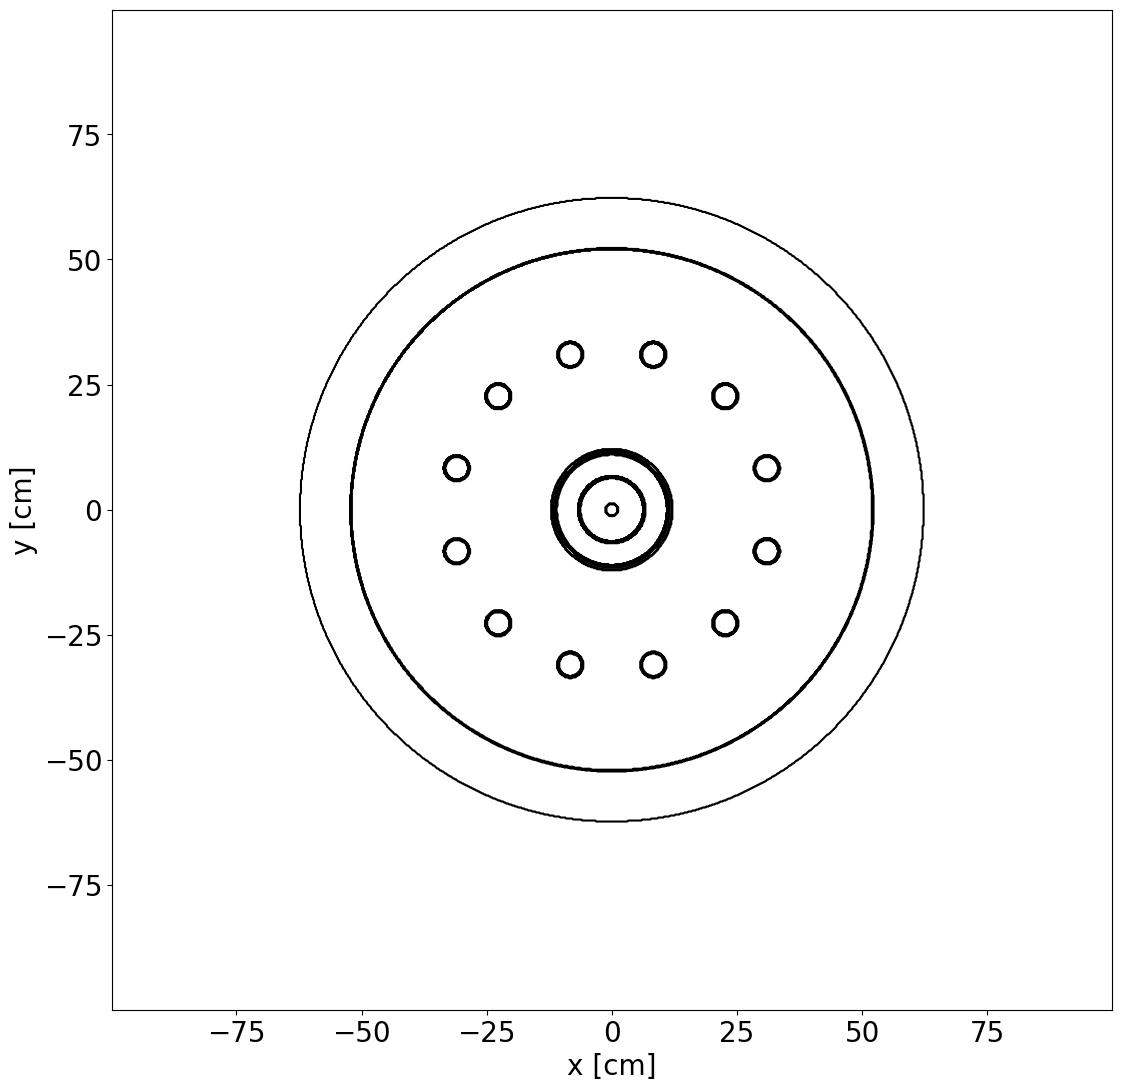

In [7]:
# Visualization
x_c = 0
y_c = 0
z_c = 30
ax = geometry.plot(
    width=(200, 200),
    origin=(x_c, y_c, z_c + 10),
    pixels=(1000, 1000),
    basis="xy",
    outline="only",
)

ax.tick_params(axis="both", labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
plt.show()

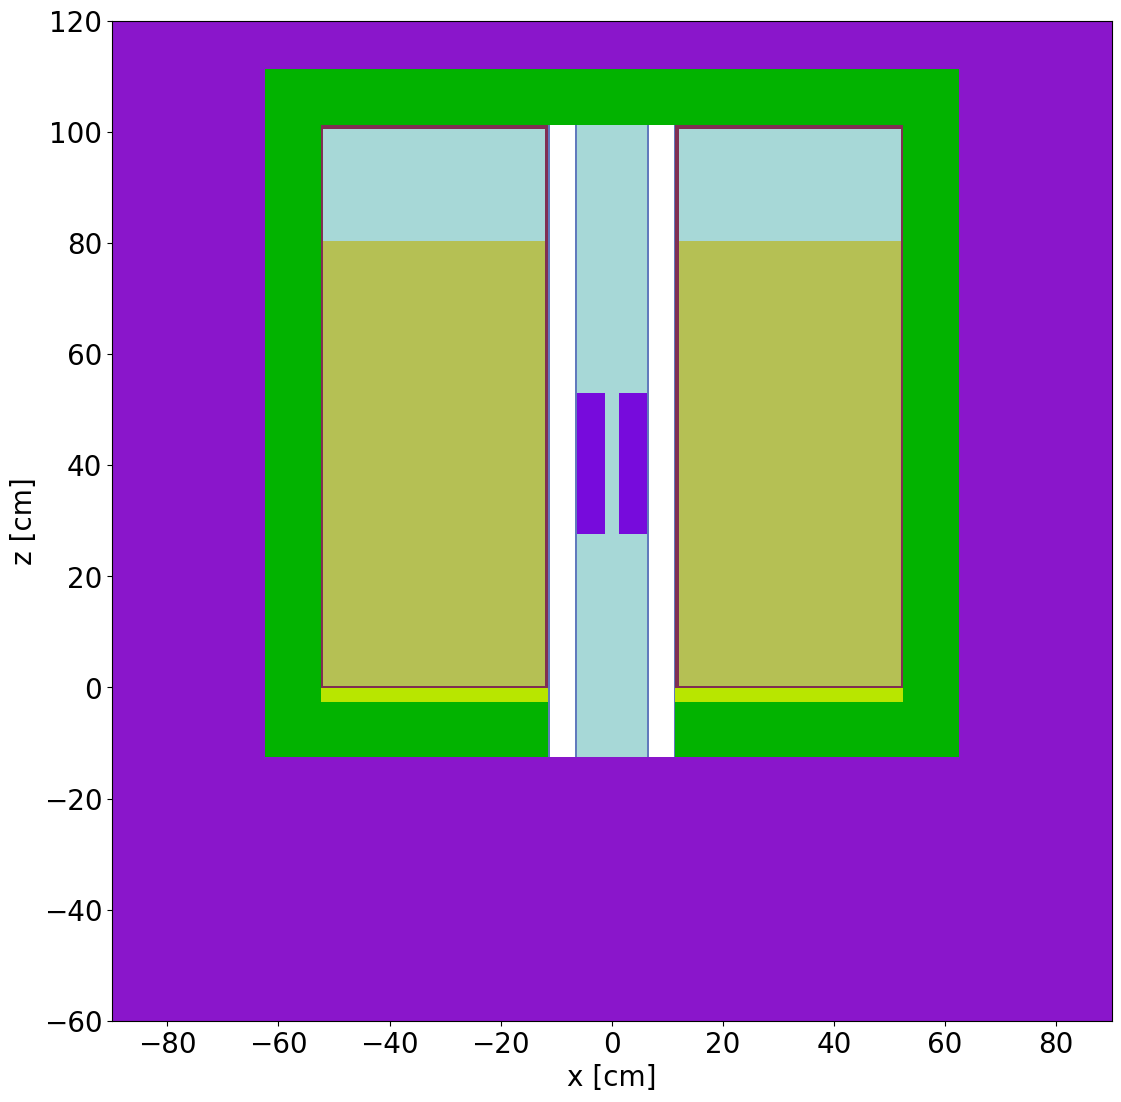

In [8]:
ax = geometry.plot(
    width=(180, 180),
    origin=(x_c, y_c, z_c),
    pixels=(1000, 1000),
    basis="xz",
    color_by="material",
    # colors={Air: "white", air: "white"},
)
ax.tick_params(axis="both", labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
plt.show()